In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
df = pd.read_csv('C:\\Users\\dhruv\\Downloads\\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
train=df.sample(frac=0.8,random_state=0) 
test=df.drop(train.index)

In [39]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
25,10,125,70,26,115,31.1,0.205,41,1
110,3,171,72,33,135,33.3,0.199,24,1
149,2,90,70,17,0,27.3,0.085,22,0
152,9,156,86,28,155,34.3,1.189,42,1


In [40]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
19,1,115,70,30,96,34.6,0.529,32,1
23,9,119,80,35,0,29.0,0.263,29,1
28,13,145,82,19,110,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
746,1,147,94,41,0,49.3,0.358,27,1
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
759,6,190,92,0,0,35.5,0.278,66,1


In [41]:
#Getting the 'X' of Training and Test set
X_train = train[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X_test = test[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [42]:
#Getting the 'Y' of Training and Test set
Y_train = np.array(train.Outcome)
Y_test = np.array(test.Outcome)


In [43]:
#Scaling and Standardizing 'X' of Train Set
Min_Max_Scaling = MinMaxScaler()
X = Min_Max_Scaling.fit_transform(X_train)

sc = StandardScaler()
X_train_std = sc.fit_transform(X)
X_train_std

array([[-0.84710271,  2.41830371,  0.37313317, ...,  1.40057412,
         2.78993639, -0.98111368],
       [-0.55124318, -0.45753343,  0.27260497, ...,  0.19377803,
        -0.21742064, -0.89478468],
       [ 0.0404759 , -1.42656551, -0.33056422, ...,  0.24568324,
        -0.25691119, -0.72212667],
       ...,
       [-0.55124318, -0.98893812,  0.07154857, ..., -0.62372899,
        -1.18645791, -0.98111368],
       [ 1.51977358,  1.07416244,  0.87577416, ...,  0.28461215,
         2.16720085,  0.74546643],
       [-1.14296225, -0.14494244, -0.12950783, ..., -0.16955842,
         0.05293772, -0.98111368]])

In [44]:
#Standardizing 'X' of Test Set
Min_Max_Scaling = MinMaxScaler()
X = Min_Max_Scaling.fit_transform(X_test)

sc = StandardScaler()
X_test_std = sc.fit_transform(X)
X_test_std

array([[ 1.27492994,  0.22340753,  1.47522188, ..., -3.70264042,
        -0.66557461,  1.71520033],
       [ 1.8781226 ,  1.58315447,  0.16580304, ...,  0.7587028 ,
         0.23610228,  0.10114075],
       [-0.83624437, -0.09281269, -0.07227312, ...,  0.35952998,
         0.21245174, -0.06026521],
       ...,
       [ 1.27492994,  1.14044617,  0.40387919, ...,  0.10124169,
        -0.04179158,  0.98887352],
       [ 0.67173728,  2.27883896,  1.23714573, ...,  0.46519338,
        -0.52958399,  2.68363609],
       [ 1.8781226 , -0.53552099,  0.28484111, ...,  0.15994358,
        -0.84590998,  2.44152715]])

In [45]:
#Executing Logistic Regression
model = LogisticRegression(solver='liblinear')
model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [46]:
#Prediction after fitting
Y_predicted = model.predict(X_test_std)
print(Y_predicted)

[0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0]


In [47]:
# #Training Accuracy
# trainAccuracy = model.score(X_train_std, Y_train)
# trainAccuracy

# #Test Accuracy
# testAccuracy = model.score(X_test_std, Y_test)
# testAccuracy

In [48]:
#Accuracy 
metrics.accuracy_score(Y_test,Y_predicted)

0.7662337662337663

In [49]:
#Precision 
metrics.precision_score(Y_test,Y_predicted)

0.6444444444444445

In [50]:
#Recall
metrics.recall_score(Y_test,Y_predicted)

0.5918367346938775

In [51]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(Y_test,Y_predicted)
cnf_matrix

array([[89, 16],
       [20, 29]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

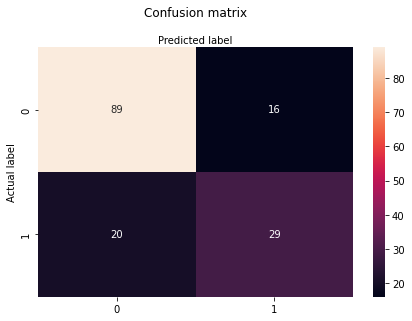

In [52]:
#Plotting Heat Map
import seaborn as sns

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')